# Diabetes Prediction Using XGB Algorithm

In [1]:
# importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

## Load and Check Data

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All features are numerical type so no need for encoding. Makes our work a lot easier.

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Features like Glucose, BloodPressure, SkinThickness, Insulin seem to be skewed.

## On comparing the minimum and maximum values with the average, some outliers are detected.

**BOXPLOT**

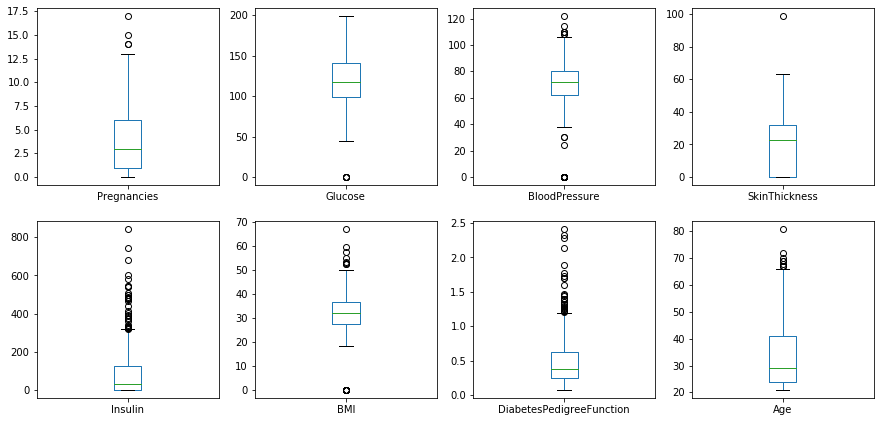

In [6]:
data1=data.drop('Outcome',axis=1) # Dropping the target
data1.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False ,figsize =(15,15))
plt.show()


There are a lot of outliers which are to dealt with for better accuracy.

## Analysis of variables

In [7]:
def bar_plot(variable):
    var =data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,7))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

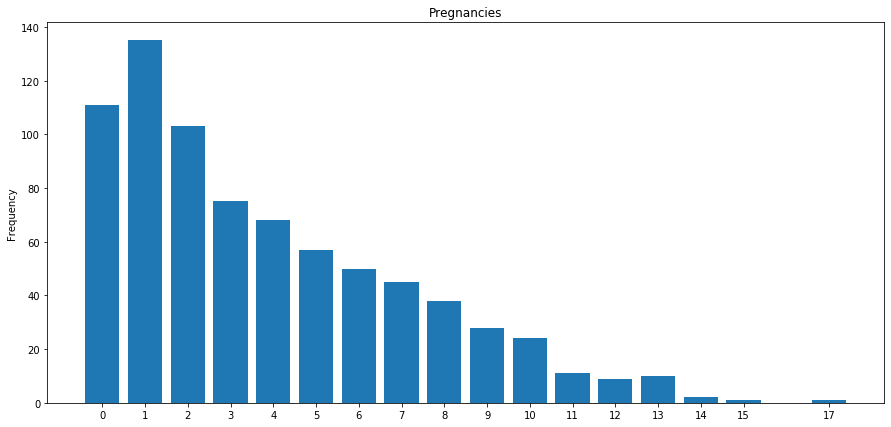

Pregnancies: 
 1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


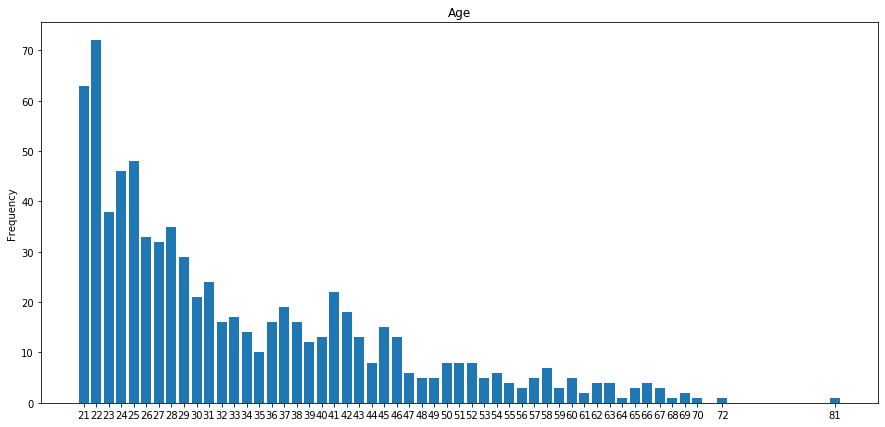

Age: 
 22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
52     8
44     8
50     8
51     8
58     7
54     6
47     6
53     5
60     5
49     5
57     5
48     5
66     4
62     4
63     4
55     4
59     3
56     3
65     3
67     3
61     2
69     2
64     1
68     1
70     1
72     1
81     1
Name: Age, dtype: int64


In [9]:
category1 = ['Pregnancies','Age']
    
for c in category1:
    bar_plot(c)

## Let's look at the distribution of variables according to the target.

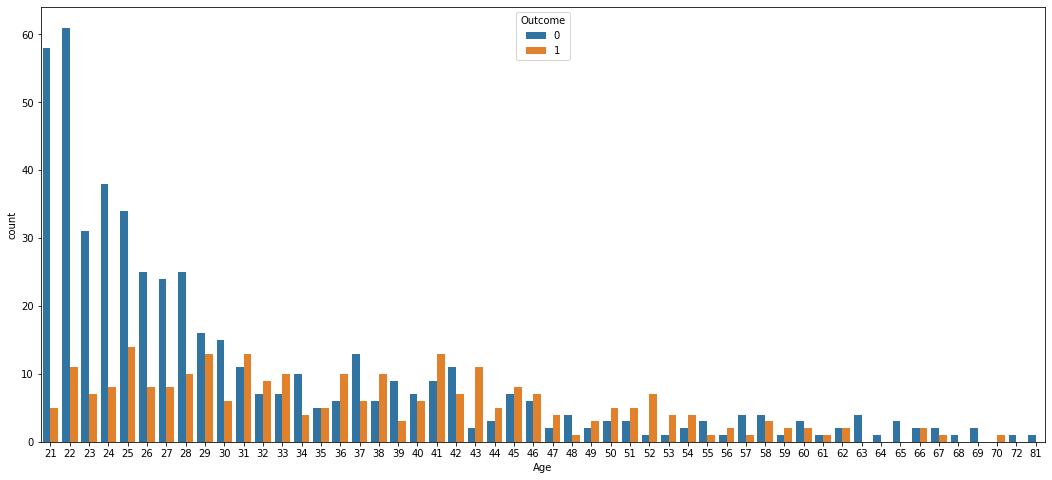

In [10]:
from matplotlib import pyplot
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(x='Age',hue='Outcome',data=data, linewidth=1,ax=ax)

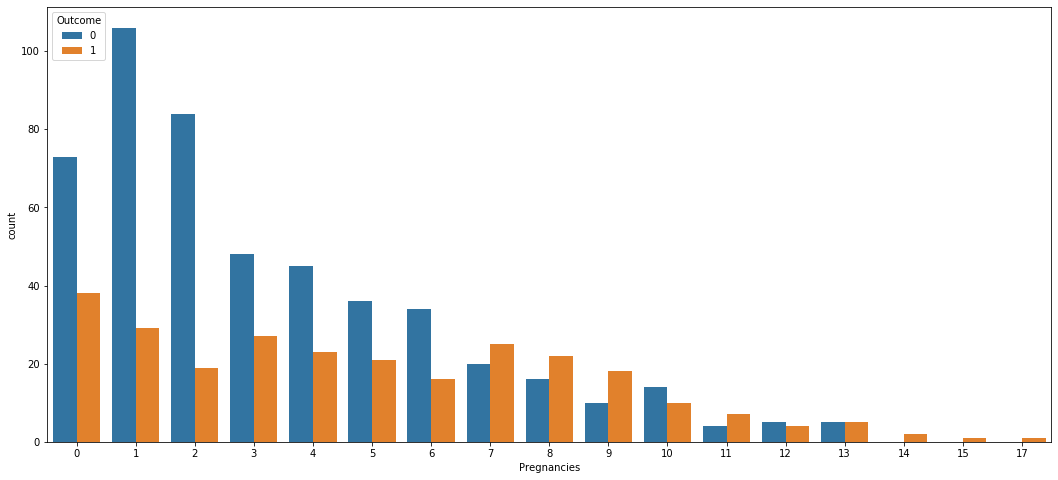

In [11]:
a4_dims = (18, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(x='Pregnancies',hue='Outcome',data=data, linewidth=1,ax=ax)

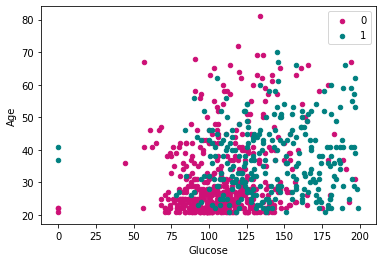

In [12]:
colors = {0:'#cd1076', 1:'#008080'}
fig, ax = plt.subplots()
grouped = data.groupby('Outcome')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='Glucose', y='Age', label=key
               ,color=colors[key])
plt.show()

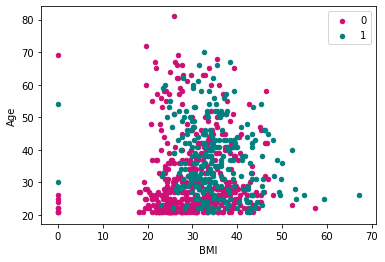

In [13]:
colors = {0:'#cd1076', 1:'#008080'}
fig, ax = plt.subplots()
grouped = data.groupby('Outcome')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter'
               ,x='BMI', y='Age', label=key
               ,color=colors[key])
plt.show()

## And the distribution of our target column

0    500
1    268
Name: Outcome, dtype: int64


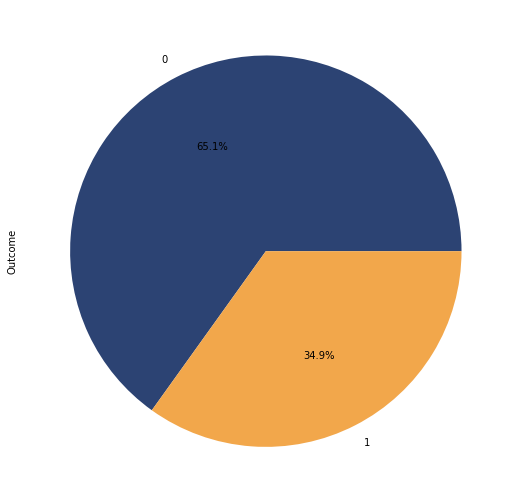

In [14]:
data['Outcome'].value_counts().plot(kind='pie',colors=['#2C4373', '#F2A74B'],autopct='%1.1f%%',figsize=(9,9))
plt.show
varValue = data.Outcome.value_counts()
print(varValue)

## Our dataset does not seem too balance. Let's balance it with Upsampling method

In [15]:
from sklearn.utils import resample
df_majority = data.loc[data.Outcome == 0].copy()
df_minority = data.loc[data.Outcome == 1].copy()
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                            n_samples=500,  # to match majority class
                            random_state=123) 
data = pd.concat([df_majority, df_minority_upsampled])

### After Balancing:

0    500
1    500
Name: Outcome, dtype: int64


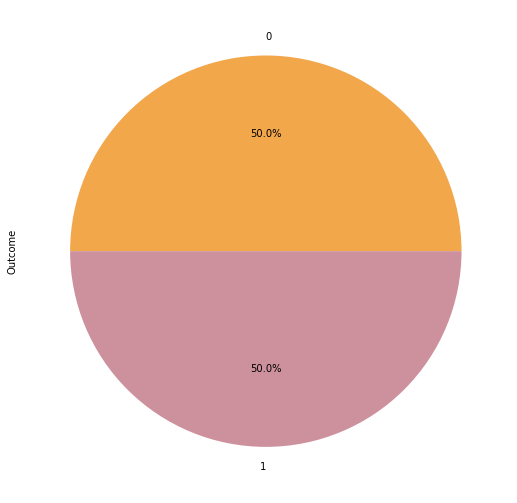

In [16]:
data['Outcome'].value_counts().plot(kind='pie',colors=['#F2A74B', '#cd919e'],autopct='%1.1f%%',figsize=(9,9))
plt.show
varValue = data.Outcome.value_counts()
print(varValue)

## Missing Value

In [17]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**No missing values**

## Outlier Detection
* Interquartile Range (IQR)

### Interquartile Range (IQR)

In [18]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [19]:
data.loc[detect_outliers(data,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
298,14,100,78,25,184,36.6,0.412,46,1
349,5,0,80,32,0,41.0,0.346,37,1
349,5,0,80,32,0,41.0,0.346,37,1
349,5,0,80,32,0,41.0,0.346,37,1
78,0,131,0,0,0,43.2,0.270,26,1


## The rows which still contain outliers are dropped.

In [20]:
data = data.drop([298,349,78,261,193,706,125,177,579,220,715,655,584,618,661,659,45,243], axis=0)

## Feature Selection

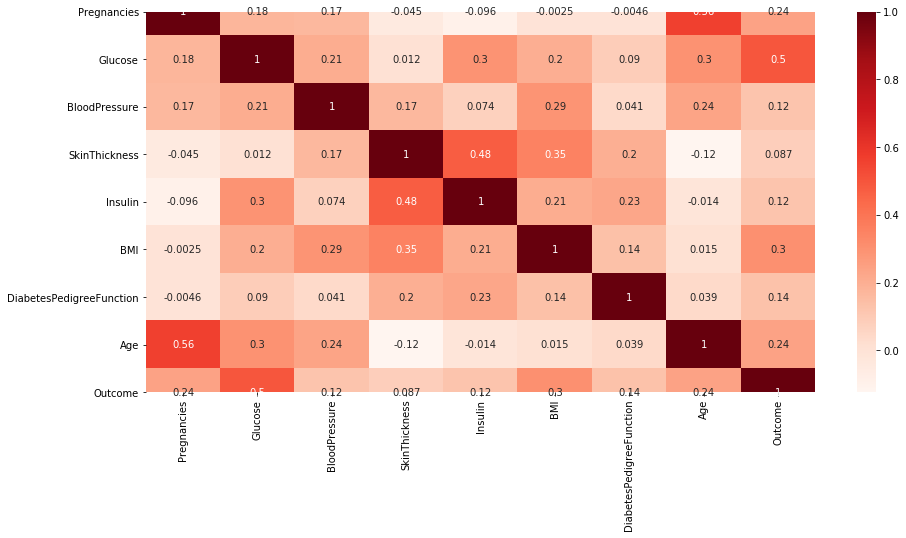

Pregnancies    0.241801
Glucose        0.498998
BMI            0.303193
Age            0.242754
Outcome        1.000000
Name: Outcome, dtype: float64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


data["Outcome"] = data.Outcome
X = data.drop("Outcome",1)
y = data["Outcome"]
data.head()
plt.figure(figsize=(15,7))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

cor_target = abs(cor["Outcome"]) #absolute value
#High Correlations
relevant_features = cor_target[cor_target>=0.2]
relevant_features

Pregnancies, Glucose, BMI, Age are found to the best correlated features with the target. So, we drop the un-necessary features.

In [22]:
newdata=data.drop(['BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction'],axis=1)

In [23]:
newdata.head()

,Pregnancies,Glucose,BMI,Age,Outcome
1,1,85,26.6,31,0
3,1,89,28.1,21,0
5,5,116,25.6,30,0
7,10,115,35.3,29,0
10,4,110,37.6,30,0


In [24]:
data=pd.DataFrame(newdata)

## Normalization

In [25]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, 0:4]
Y = data.iloc[:, 4]
nd = StandardScaler()
nd.fit(X)
X =nd.transform(X)
print(Y)

1      0
3      0
5      0
7      0
10     0
      ..
23     1
429    1
701    1
476    1
110    1
Name: Outcome, Length: 941, dtype: int64


## Building Models

In [26]:
# importin the Evaluation metrics to check the accuracy
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:4]
Y = data.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 20)

### 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Logistic Regression
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred_reg = reg.predict(X_test)

In [30]:
log_score = accuracy_score(y_test, y_pred_reg)
print('Accuracy for logistic regression:',log_score * 100,'%')

Accuracy for logistic regression: 77.24867724867724 %


**Confusion Matrix**

[[84 17]
 [26 62]]


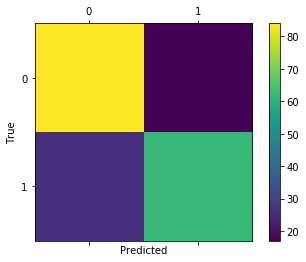

In [31]:
cm_log = confusion_matrix(y_test, y_pred_reg) 
print(cm_log) 

fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm_log) 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

### 2. K Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# K Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
y_pred_knn = knn.predict(X_test)

In [35]:
knn_score = accuracy_score(y_test, y_pred_knn)
print('Accuracy for knn classifier:',knn_score * 100,'%')

Accuracy for knn classifier: 75.13227513227513 %


**Randomized SearchCV**

In [36]:
params = {'n_neighbors':[2,4], 'algorithm':['ball_tree', 'kd_tree'], 'metric':['minkowski','euclidean']}

In [37]:
knn_rs = RandomizedSearchCV(knn,param_distributions=params,cv=10)
knn_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'metric': ['minkowski', 'euclidean'],
                                        'n_neighbors': [2, 4]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [38]:
knn_rs.best_params_

{'n_neighbors': 2, 'metric': 'minkowski', 'algorithm': 'ball_tree'}

In [39]:
y_pred_knn_rs = knn_rs.predict(X_test)

In [40]:
knn_score_tuned = accuracy_score(y_test, y_pred_knn_rs) 
print('Accuracy for KNN classifier using hyperparameters:',knn_score_tuned* 100,'%')

Accuracy for KNN classifier using hyperparameters: 77.24867724867724 %


**Confusion Matrix**

[[89 12]
 [31 57]]


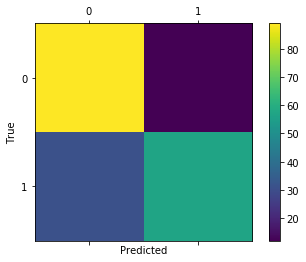

In [41]:
cm_knn = confusion_matrix(y_test, y_pred_knn_rs) 
print(cm_knn) 

fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm_knn) 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

### 3. Decision Tree 

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Decision Tree Classifier
dectree = DecisionTreeClassifier(min_impurity_decrease=0.2,random_state=20)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

In [44]:
y_pred_dectree = dectree.predict(X_test)

In [45]:
dectree_score = accuracy_score(y_test, y_pred_dectree)
print('Accuracy for decision tree classifier:', dectree_score* 100,'%')

Accuracy for decision tree classifier: 53.43915343915344 %


**Randomized SearchCV**

In [46]:
params = {'max_depth':[2,20], 'splitter':['best','random']
        , 'min_samples_split':[2,14], 'min_samples_leaf':[30,50]
        , 'min_impurity_decrease':[0.0,0.9]}

In [47]:
dectree_rs = RandomizedSearchCV(dectree,param_distributions=params, cv=10)
dectree_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.2,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=20,
                                                    splitter='best'),

In [48]:
dectree_rs.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 30,
 'min_impurity_decrease': 0.0,
 'max_depth': 20}

In [49]:
y_pred_dectree_rs = dectree_rs.predict(X_test)

In [50]:
dectree_score_tuned = accuracy_score(y_test, y_pred_dectree_rs) 
print('Accuracy for decision tree classifier using hyperparameters:',dectree_score_tuned* 100,'%')

Accuracy for decision tree classifier using hyperparameters: 77.77777777777779 %


**Confusion Matrix**

[[83 18]
 [24 64]]


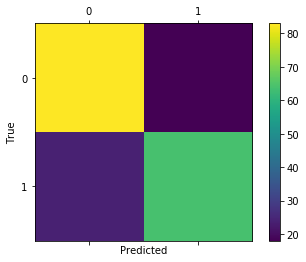

In [51]:
cm_dectree = confusion_matrix(y_test, y_pred_dectree_rs) 
print(cm_dectree) 

fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm_dectree) 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

### 4. Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Random Forest Classifier
ranforest = RandomForestClassifier(random_state=30)
ranforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [54]:
y_pred_ranforest = ranforest.predict(X_test)

In [55]:
ranforest_score = accuracy_score(y_test, y_pred_ranforest)
print('Accuracy for random forest classifier:',ranforest_score * 100,'%')

Accuracy for random forest classifier: 86.77248677248677 %


**Randomized SearchCV**

In [56]:
params = {'criterion':['gini','entropy'], 'min_impurity_decrease':[0.0,0.4]
        , 'min_samples_leaf':[1,3], 'min_samples_split':[2,6]
        , 'n_estimators':[5,30]}

In [57]:
ranforest_rs = RandomizedSearchCV(ranforest,param_distributions=params,cv=10)
ranforest_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
 

In [58]:
ranforest_rs.best_params_

{'n_estimators': 5,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'criterion': 'entropy'}

In [59]:
y_pred_ranforest_rs = ranforest_rs.predict(X_test)

In [60]:
ranforest_score_tuned = accuracy_score(y_test, y_pred_ranforest_rs)
print('Accuracy for random forest classifier with hyperparameters:',ranforest_score_tuned * 100,'%')

Accuracy for random forest classifier with hyperparameters: 85.18518518518519 %


**Confusion Matrix**

[[80 21]
 [ 7 81]]


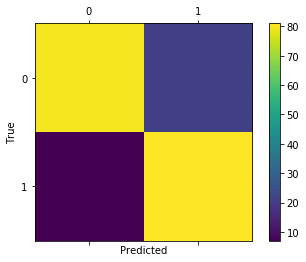

In [61]:
cm_ranforest = confusion_matrix(y_test, y_pred_ranforest_rs) 
print(cm_ranforest) 

fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm_ranforest) 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

### 5. Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
y_pred_gbc = gbc.predict(X_test)

In [65]:
gbc_score = accuracy_score(y_test, y_pred_gbc)
print('Accuracy for gradient boosting classifier:',gbc_score * 100,'%')

Accuracy for gradient boosting classifier: 83.06878306878306 %


**Randomized SearchCV**

In [66]:
params ={'max_depth':[2,6], 'min_samples_leaf':[1,2]
        , 'min_samples_split':[2,5] , 'min_weight_fraction_leaf':[0.0,0.3]
        , 'n_estimators':[50,100], 'subsample':[0.2,1.0]}

In [67]:
gbc_rs = RandomizedSearchCV(gbc,param_distributions=params, cv=10)
gbc_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [68]:
gbc_rs.best_params_

{'subsample': 1.0,
 'n_estimators': 100,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 6}

In [69]:
y_pred_gbc_rs = gbc_rs.predict(X_test)

In [70]:
gbc_score_tuned = accuracy_score(y_test, y_pred_gbc_rs)
print('Accuracy for gradient boosting with hyperparameters:',gbc_score_tuned * 100,'%')

Accuracy for gradient boosting with hyperparameters: 89.41798941798942 %


**Confusion Matrix**

[[86 15]
 [ 5 83]]


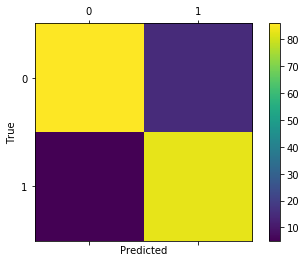

In [71]:
cm_gbc = confusion_matrix(y_test, y_pred_gbc_rs) 
print(cm_gbc) 

fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm_gbc) 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

### 6. XGBOOST Classifier

In [72]:
from xgboost import XGBClassifier

xgb =XGBClassifier(learning_rate=0.08, random_state=10)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.08, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
y_pred_xgb = xgb.predict(X_test)

In [74]:
xgb_score = accuracy_score(y_test, y_pred_xgb)
print('Accuracy for XGBoost Classifier:',xgb_score*100,'%')

Accuracy for XGBoost Classifier: 84.65608465608466 %


**RandomizedSearchCV**

In [75]:
from sklearn.model_selection import RandomizedSearchCV
xgb_params = {
    'learning_rate' : [0.0001, 0.006, 0.04, 0.09],      
    'max_depth': range(1,20),
    'n_estimators': [100, 200, 300,500,1000]}
xgb_rs =XGBClassifier()
xgb_randomcv_model=RandomizedSearchCV(estimator=xgb_rs, param_distributions=xgb_params, n_iter=2, cv=5, random_state=250).fit(X_train,y_train)
print('Best Parameters Random Search:',xgb_randomcv_model.best_params_)

Best Parameters Random Search: {'n_estimators': 200, 'max_depth': 17, 'learning_rate': 0.09}


In [76]:
xgb_randomcv_model.best_params_

{'n_estimators': 200, 'max_depth': 17, 'learning_rate': 0.09}

In [77]:
y_pred_xgb_rs = xgb_randomcv_model.predict(X_test)

In [78]:
xgb_score_tuned = accuracy_score(y_test, y_pred_xgb_rs)
print('Accuracy for Random Search:',xgb_score_tuned*100,'%')

Accuracy for Random Search: 88.88888888888889 %


**Confusion Matrix**

[[85 16]
 [ 5 83]]


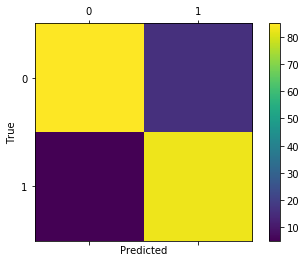

In [79]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb_rs) 
print(cm_xgb) 

fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm_xgb) 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

## Summary

In [80]:
summary=pd.DataFrame()
summary['Models'] = ['Logistic Regression','K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoosting']
summary['Accuracy_Score'] = log_score,knn_score,dectree_score,ranforest_score,gbc_score,xgb_score
summary['Tuned_Accuracy_Score'] = '------',knn_score_tuned,dectree_score_tuned,ranforest_score_tuned,gbc_score_tuned,xgb_score_tuned

summary

,Models,Accuracy_Score,Tuned_Accuracy_Score
0,Logistic Regression,0.772487,------
1,K Nearest Neighbors,0.751323,0.772487
2,Decision Tree,0.534392,0.777778
3,Random Forest,0.867725,0.851852
4,Gradient Boosting,0.830688,0.894180
5,XGBoosting,0.846561,0.888889
